In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#display plots
%matplotlib inline

#loading file
df = pd.read_csv("googleplaystore.csv")

#soe firt rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [11]:
# Ensure 'Installs' is string so .str works
df.loc[:,'Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)

In [20]:
df = df[df['Installs'].str.isnumeric()]

In [21]:
df['Installs'] = df['Installs'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.4+ MB


In [26]:
df['Reviews']=df['Reviews'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.4+ MB


In [28]:
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.4+ MB


In [30]:
df.loc[:,'Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df.loc[:,'Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [31]:
df.dropna(inplace=True)

In [32]:
df.describe()

,Rating,Reviews,Installs,Price
count,8886.000000,8.886000e+03,8.886000e+03,8886.000000
mean,4.187959,4.730928e+05,1.650061e+07,0.963526
std,0.522428,2.906007e+06,8.640413e+07,16.194792
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,1.000000e+04,0.000000
50%,4.300000,4.723000e+03,5.000000e+05,0.000000
75%,4.500000,7.131325e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   float64
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   float64
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   float64
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(4), object(9)
memory usage: 971.9+ KB


In [36]:
df.to_excel("cleaned_app_data.xlsx", index=False)

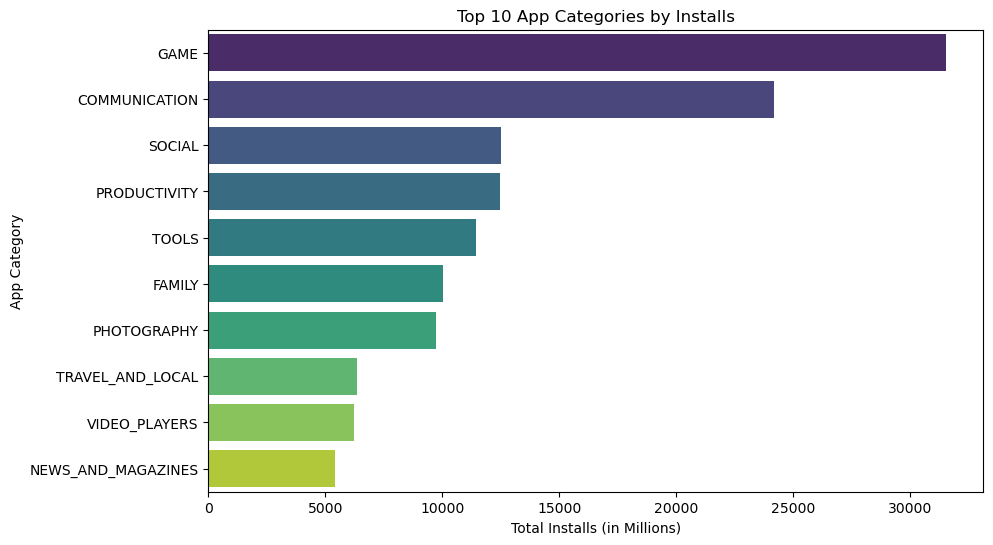

In [43]:
# Group and sort
top_categories = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
top_categories_million = top_categories / 1_000_000  # Scale to millions

top_cat_df = top_categories_million.reset_index()
top_cat_df.columns = ['Category', 'Installs']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_cat_df, x='Installs', y='Category', hue='Category', palette='viridis', legend=False)
plt.xlabel("Total Installs (in Millions)")
plt.ylabel("App Category")
plt.title("Top 10 App Categories by Installs")
plt.show()


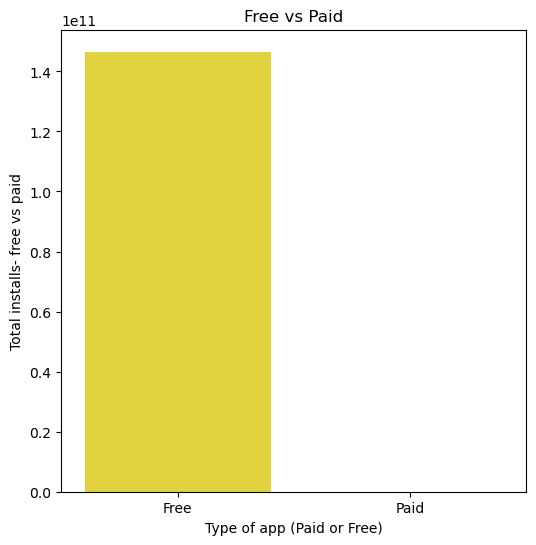

In [44]:
#free vs paid
type_installs=df.groupby('Type')['Installs'].sum()


free_vs_paid=type_installs.reset_index()
free_vs_paid.columns=['Type','Installs']

plt.figure(figsize=(6,6))
sns.barplot(data=free_vs_paid,x='Type',y='Installs',hue='Installs',palette='viridis',legend=False)
plt.xlabel("Type of app (Paid or Free)")
plt.ylabel("Total installs- free vs paid")
plt.title("Free vs Paid")
plt.show()

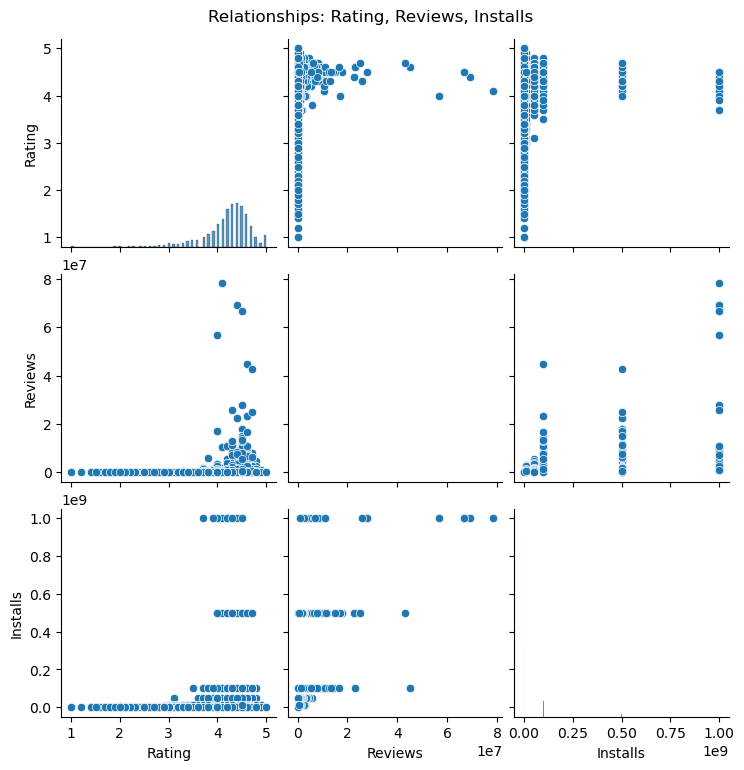

In [47]:
# Remove rows with missing data for analysis
df_corr = df[['Rating', 'Reviews', 'Installs']].dropna()

# Plot pairplot
sns.pairplot(df_corr)
plt.suptitle("Relationships: Rating, Reviews, Installs", y=1.02)
plt.show()

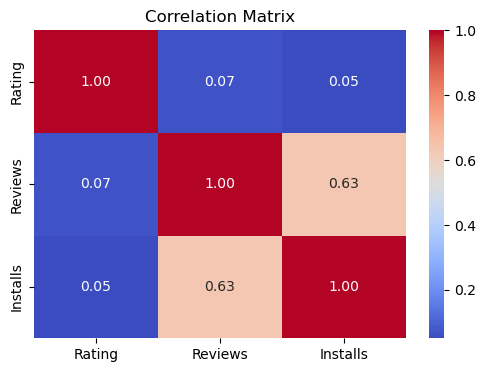

In [48]:
# Heatmap for correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

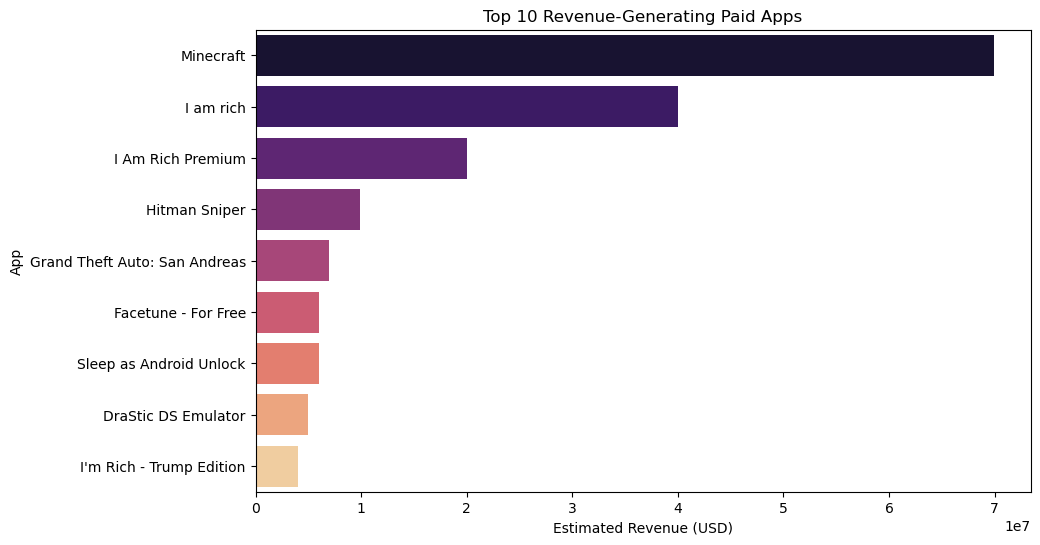

In [50]:
# Estimate revenue = price * installs (only for paid)
paid_apps = df[df['Type'] == 'Paid'].copy()
paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']

# Top 10 apps by revenue
top_revenue = paid_apps.sort_values(by='Revenue', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_revenue, x='Revenue', y='App', hue='App', palette='magma', legend=False)

plt.xlabel("Estimated Revenue (USD)")
plt.title("Top 10 Revenue-Generating Paid Apps")
plt.show()


In [51]:
# Export cleaned/updated DataFrame
df.to_csv(r'C:\Users\anant\OneDrive\Desktop\app_analysis\cleaned_app_data_final.csv', index=False, encoding='utf-8')
